# Debugging notebook for alphaDIA
This notebooks allows you to run a search in a jupyter notebook and debug the results.
It allows you to debug a search on the workflow level as well on the peakgroup level

## Requirements
- conda environment with latest alphadia (developer version, extra 'stable', tag v1.9.3-dev2)
- mono installed

In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from alphadia import search_step
from alphadia.workflow import peptidecentric


## Obtain raw data

In [6]:
base_folder = "/Users/georgwallmann/Documents/data/alphadia-validate"

data_folder = f'{base_folder}/data'
output_folder = f'{base_folder}/output'

if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# HeLa library as used in the getting started guide
library_url = "https://datashare.biochem.mpg.de/s/Uw2yfNSbApfPpTk"

# Bulk injections of HeLa cell lysate acquired on the Orbitrap Astral
raw_data_url_list = [
    "https://datashare.biochem.mpg.de/s/339jg5HtGrwLwDN/download?files=20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_05.raw",
    #"https://datashare.biochem.mpg.de/s/339jg5HtGrwLwDN/download?files=20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_06.raw",
    #"https://datashare.biochem.mpg.de/s/339jg5HtGrwLwDN/download?files=20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_07.raw",
]

from alphadia.test_data_downloader import DataShareDownloader

library_path = DataShareDownloader(library_url,data_folder).download()
raw_data_path_list = [DataShareDownloader(url,data_folder).download() for url in raw_data_url_list]

/Users/georgwallmann/Documents/data/alphadia-validate/data/hela_hybrid.hdf already exists
/Users/georgwallmann/Documents/data/alphadia-validate/data/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_05.raw already exists


## Run search

0:00:21.982704 INFO: loading config from /Users/georgwallmann/Documents/git/alphadia/alphadia/constants/default.yaml


0:00:21.991250 INFO: loading additional config provided via CLI
0:00:21.992111 INFO: Updating config with 'user defined'
0:00:21.992500 INFO: ├──version: 1
0:00:21.992657 INFO: ├──output_directory: None
0:00:21.993005 INFO: ├──library_path: /Users/georgwallmann/Documents/data/alphadia-validate/data/hela_hybrid.hdf [user defined, default: None]
0:00:21.993340 INFO: ├──raw_paths:
0:00:21.993678 INFO: │   - /Users/georgwallmann/Documents/data/alphadia-validate/data/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_05.raw [user defined, default: None]
0:00:21.994049 INFO: ├──fasta_paths:
0:00:21.994351 INFO: ├──quant_directory: None
0:00:21.994581 INFO: ├──general
0:00:21.994889 INFO: │   ├──thread_count: 10
0:00:21.995129 INFO: │   ├──reuse_calibration: False
0:00:21.995366 INFO: │   ├──reuse_quant: False
0:00:21.995707 INFO: │   ├──astral_ms1: False
0:00:21.996062 INFO: │   ├──log_level: INFO
0:00:21.996312 INFO: │   ├──mmap_detector_events: False
0:00:21.996576 INFO: │   ├──use_gpu:

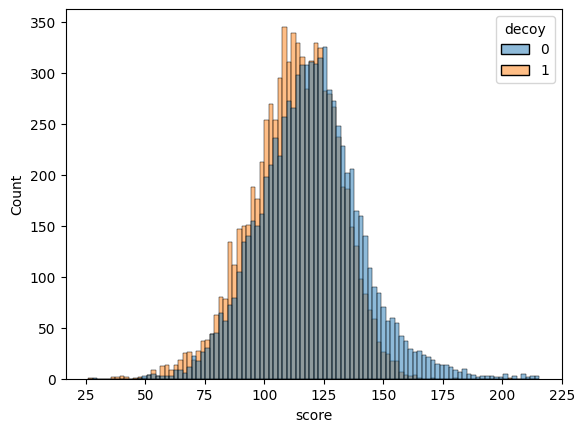

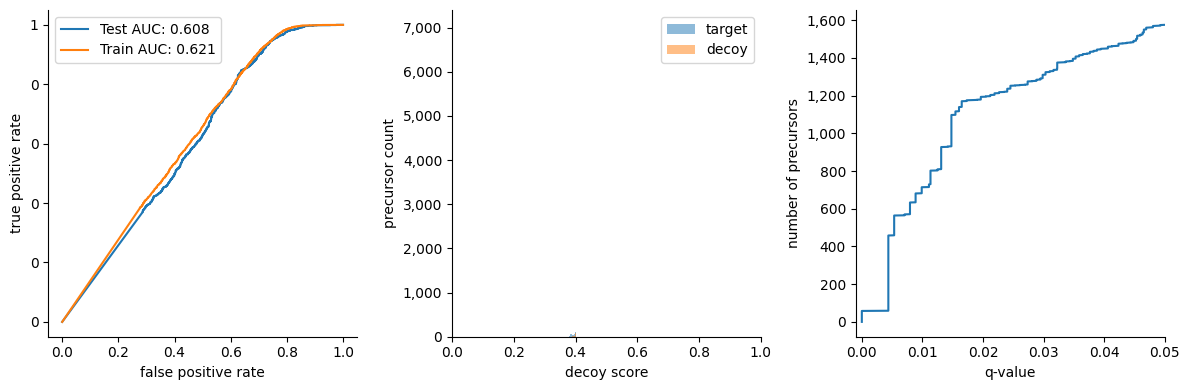

0:01:55.687116 INFO: Resetting torch num_threads to 10
0:01:55.689845 INFO: === FDR correction performed with classifier version -1 ===
0:01:55.691134 PROGRESS: ============================= Precursor FDR =============================
0:01:55.691534 PROGRESS: Total precursors accumulated: 1,799
0:01:55.691959 PROGRESS: Target precursors: 1,672 (92.94%)
0:01:55.692351 PROGRESS: Decoy precursors: 127 (7.06%)
0:01:55.692668 PROGRESS: 
0:01:55.693089 PROGRESS: Precursor Summary:
0:01:55.694311 PROGRESS: Channel   0:	 0.05 FDR: 1,501; 0.01 FDR:   708; 0.001 FDR:    59
0:01:55.694865 PROGRESS: 
0:01:55.695270 PROGRESS: Protein Summary:
0:01:55.697399 PROGRESS: Channel   0:	 0.05 FDR: 1,207; 0.01 FDR:   597; 0.001 FDR:    57
0:01:55.697950 PROGRESS: =========================================================================
0:01:55.702366 INFO: fragments_df_filtered: 5000
0:01:55.725169 INFO: calibration group: precursor, fitting mz estimator 


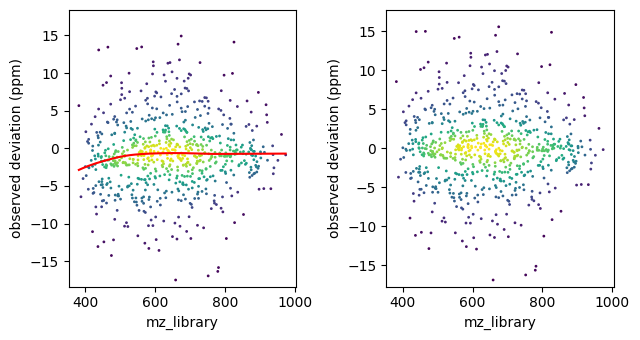

0:01:55.844027 INFO: calibration group: precursor, fitting rt estimator 


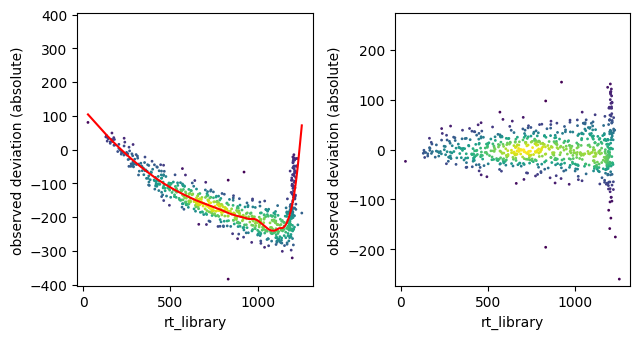

0:01:55.986254 INFO: calibration group: fragment, fitting mz estimator 


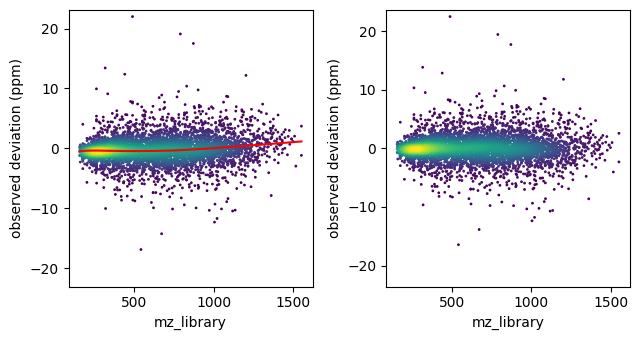

0:01:56.406541 INFO: calibration group: precursor, predicting mz
0:01:56.414220 INFO: calibration group: precursor, predicting rt
0:01:56.419475 INFO: calibration group: fragment, predicting mz
0:01:56.462483 PROGRESS: Required number of precursors found. Starting search parameter optimization.
0:01:56.464019 INFO: Starting optimization step 1.
0:01:56.465015 PROGRESS: === Extracting elution groups 0 to 8000 ===
0:01:56.465912 PROGRESS: Extracting batch of 15881 precursors
0:01:56.469622 INFO: Duty cycle consists of 301 frames, 1.55 seconds cycle time
0:01:56.470213 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
0:01:56.471036 INFO: FWHM in RT is 3.61 seconds, sigma is 0.49
0:01:56.472956 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
0:01:56.474038 INFO: Starting candidate selection
100%|██████████| 15881/15881 [00:02<00:00, 6750.94it/s]
0:01:58.983095 INFO: Starting candidate scoring
100%|██████████| 31762/31762 [00:00<00:00, 82020.64it/s]
0:01:59.391214 INFO: F

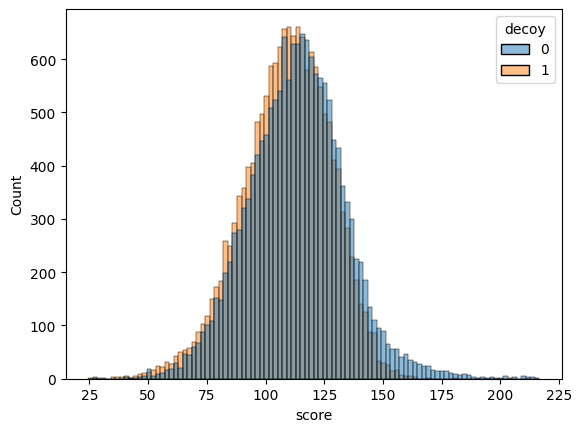

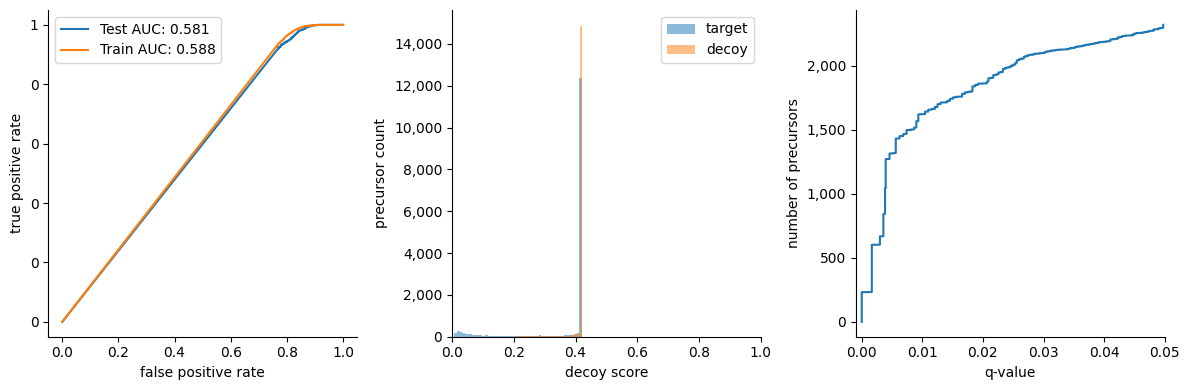

0:02:00.021727 INFO: Resetting torch num_threads to 10
0:02:00.023139 INFO: === FDR correction performed with classifier version 0 ===
0:02:00.024438 PROGRESS: ============================= Precursor FDR =============================
0:02:00.024892 PROGRESS: Total precursors accumulated: 2,553
0:02:00.025330 PROGRESS: Target precursors: 2,391 (93.65%)
0:02:00.025839 PROGRESS: Decoy precursors: 162 (6.35%)
0:02:00.026282 PROGRESS: 
0:02:00.026669 PROGRESS: Precursor Summary:
0:02:00.028141 PROGRESS: Channel   0:	 0.05 FDR: 2,211; 0.01 FDR: 1,607; 0.001 FDR:   233
0:02:00.028501 PROGRESS: 
0:02:00.028812 PROGRESS: Protein Summary:
0:02:00.030463 PROGRESS: Channel   0:	 0.05 FDR: 1,694; 0.01 FDR: 1,263; 0.001 FDR:   206
0:02:00.030849 PROGRESS: =========================================================================
0:02:00.038202 INFO: fragments_df_filtered: 5000
0:02:00.057975 INFO: calibration group: precursor, fitting mz estimator 


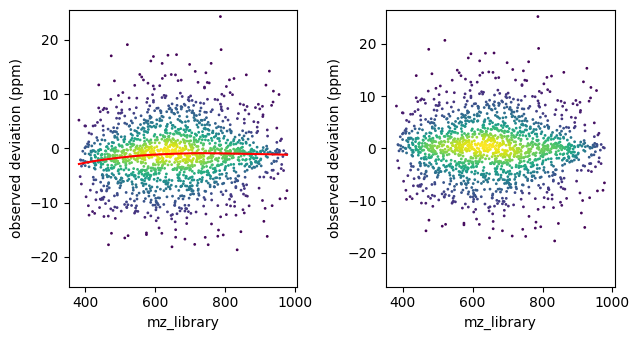

0:02:00.251901 INFO: calibration group: precursor, fitting rt estimator 


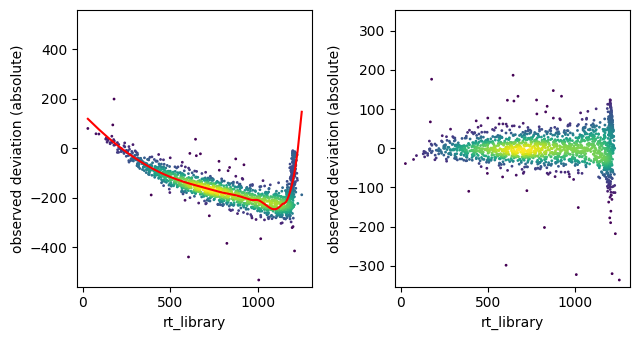

0:02:00.400898 INFO: calibration group: fragment, fitting mz estimator 


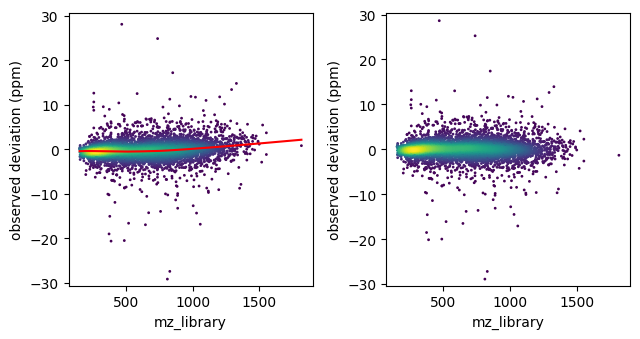

0:02:01.102396 INFO: calibration group: precursor, predicting mz
0:02:01.104444 INFO: calibration group: precursor, predicting rt
0:02:01.108212 INFO: calibration group: fragment, predicting mz
0:02:01.166627 INFO: === checking if optimization conditions were reached ===
0:02:01.214601 PROGRESS: ❌ ms2_error      : 7.0000 > 7.0000 or insufficient steps taken.
0:02:01.226483 PROGRESS: ❌ ms1_error      : 11.4001 > 4.0000 or insufficient steps taken.
0:02:01.227437 INFO: ==============================================
0:02:01.239850 INFO: Starting optimization step 2.
0:02:01.240927 PROGRESS: === Extracting elution groups 0 to 8000 ===
0:02:01.242129 PROGRESS: Extracting batch of 15881 precursors
0:02:01.250060 INFO: Duty cycle consists of 301 frames, 1.55 seconds cycle time
0:02:01.250936 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
0:02:01.252556 INFO: FWHM in RT is 3.58 seconds, sigma is 0.49
0:02:01.253285 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
0:02:01.25

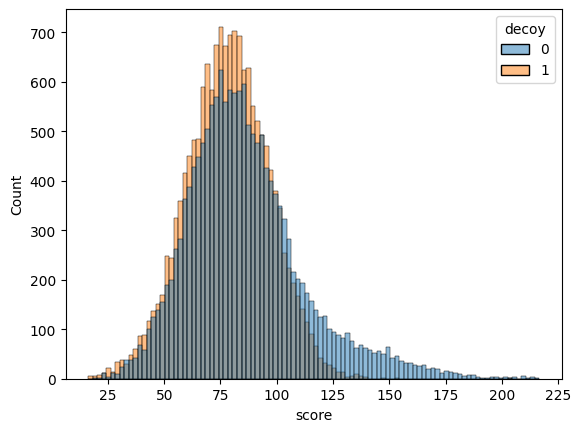

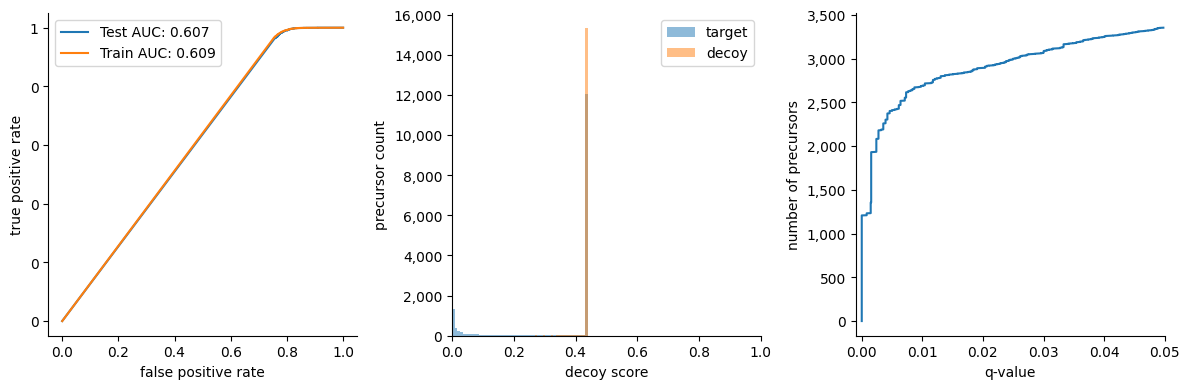

0:02:04.774744 INFO: Resetting torch num_threads to 10
0:02:04.776452 INFO: === FDR correction performed with classifier version 1 ===
0:02:04.778029 PROGRESS: ============================= Precursor FDR =============================
0:02:04.778939 PROGRESS: Total precursors accumulated: 3,363
0:02:04.779412 PROGRESS: Target precursors: 3,199 (95.12%)
0:02:04.779783 PROGRESS: Decoy precursors: 164 (4.88%)
0:02:04.780059 PROGRESS: 
0:02:04.780356 PROGRESS: Precursor Summary:
0:02:04.782202 PROGRESS: Channel   0:	 0.05 FDR: 3,194; 0.01 FDR: 2,661; 0.001 FDR: 1,231
0:02:04.782567 PROGRESS: 
0:02:04.782974 PROGRESS: Protein Summary:
0:02:04.785073 PROGRESS: Channel   0:	 0.05 FDR: 2,328; 0.01 FDR: 1,982; 0.001 FDR: 1,017
0:02:04.785477 PROGRESS: =========================================================================
0:02:04.797603 INFO: fragments_df_filtered: 5000
0:02:04.818733 INFO: calibration group: precursor, fitting mz estimator 


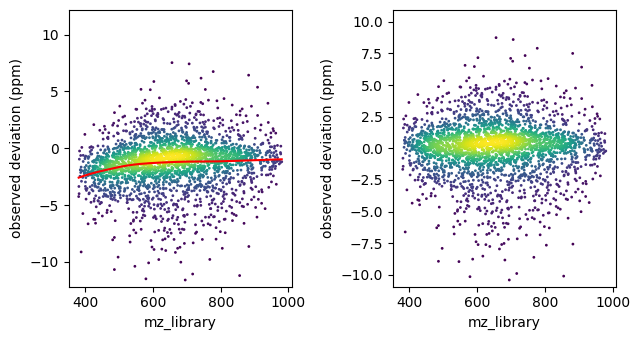

0:02:05.028823 INFO: calibration group: precursor, fitting rt estimator 


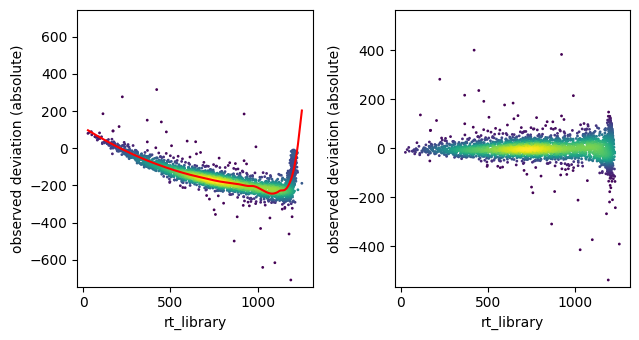

0:02:05.284515 INFO: calibration group: fragment, fitting mz estimator 


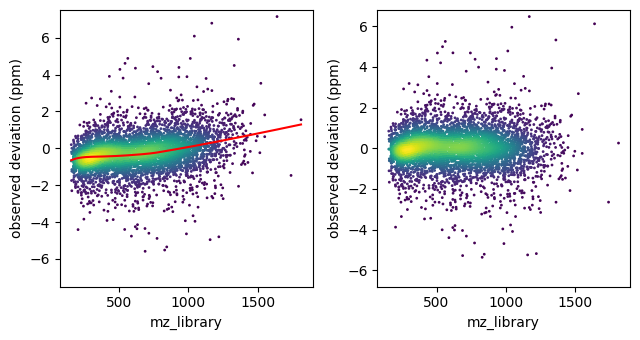

0:02:05.689010 INFO: calibration group: precursor, predicting mz
0:02:05.693665 INFO: calibration group: precursor, predicting rt
0:02:05.699665 INFO: calibration group: fragment, predicting mz
0:02:05.736086 INFO: === checking if optimization conditions were reached ===
0:02:05.739355 PROGRESS: ✅ ms2_error      : 7.0000 <= 7.0000
0:02:05.745120 PROGRESS: ❌ ms1_error      : 4.6352 > 4.0000 or insufficient steps taken.
0:02:05.745872 INFO: ==============================================
0:02:05.747387 INFO: Starting optimization step 3.
0:02:05.748687 PROGRESS: === Extracting elution groups 0 to 8000 ===
0:02:05.749512 PROGRESS: Extracting batch of 15881 precursors
0:02:05.755926 INFO: Duty cycle consists of 301 frames, 1.55 seconds cycle time
0:02:05.757001 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
0:02:05.757543 INFO: FWHM in RT is 3.13 seconds, sigma is 0.43
0:02:05.758830 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
0:02:05.759721 INFO: Starting candidate

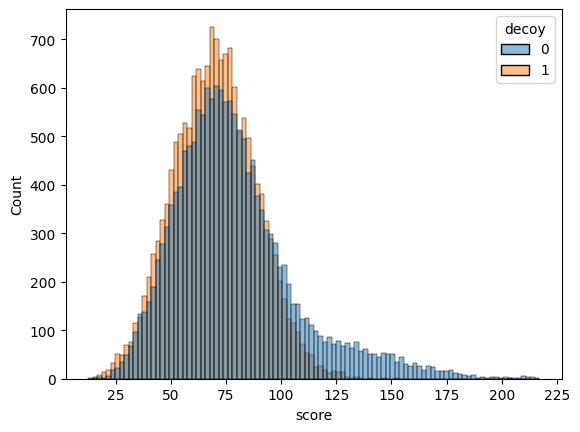

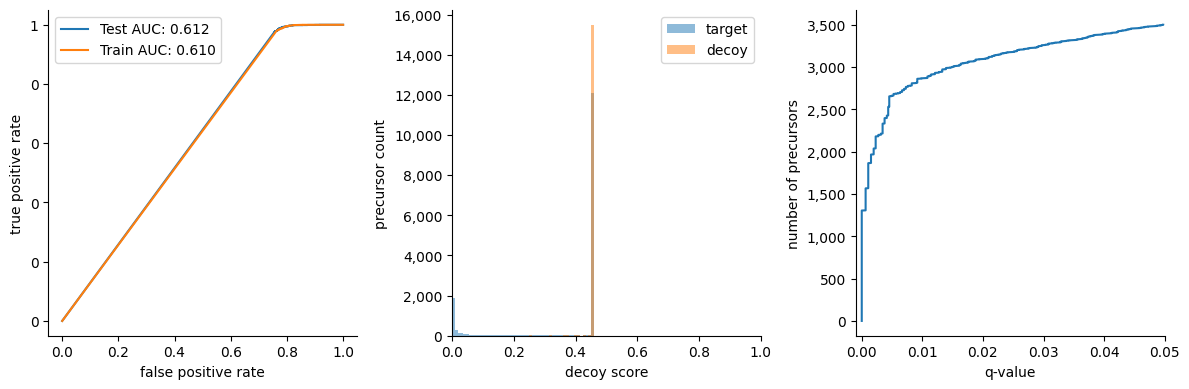

0:02:09.263368 INFO: Resetting torch num_threads to 10
0:02:09.265138 INFO: === FDR correction performed with classifier version 2 ===
0:02:09.266518 PROGRESS: ============================= Precursor FDR =============================
0:02:09.266953 PROGRESS: Total precursors accumulated: 3,505
0:02:09.267394 PROGRESS: Target precursors: 3,337 (95.21%)
0:02:09.267806 PROGRESS: Decoy precursors: 168 (4.79%)
0:02:09.268222 PROGRESS: 
0:02:09.268661 PROGRESS: Precursor Summary:
0:02:09.270410 PROGRESS: Channel   0:	 0.05 FDR: 3,336; 0.01 FDR: 2,841; 0.001 FDR: 1,567
0:02:09.270769 PROGRESS: 
0:02:09.271125 PROGRESS: Protein Summary:
0:02:09.273328 PROGRESS: Channel   0:	 0.05 FDR: 2,399; 0.01 FDR: 2,088; 0.001 FDR: 1,251
0:02:09.273741 PROGRESS: =========================================================================
0:02:09.284197 INFO: fragments_df_filtered: 5000
0:02:09.304166 INFO: calibration group: precursor, fitting mz estimator 


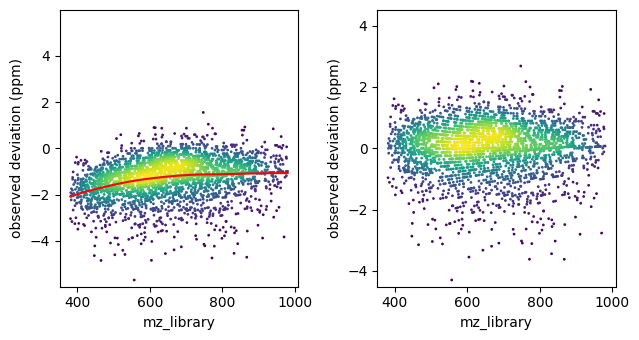

0:02:09.541263 INFO: calibration group: precursor, fitting rt estimator 


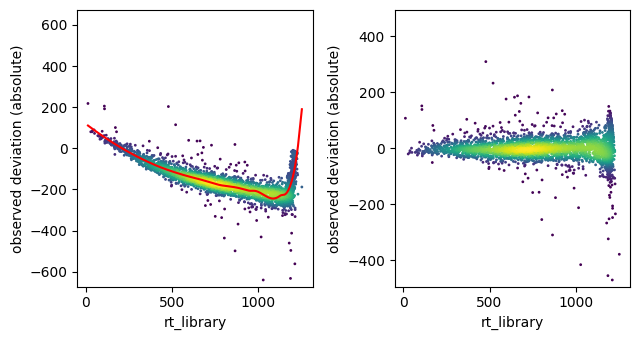

0:02:09.806813 INFO: calibration group: fragment, fitting mz estimator 


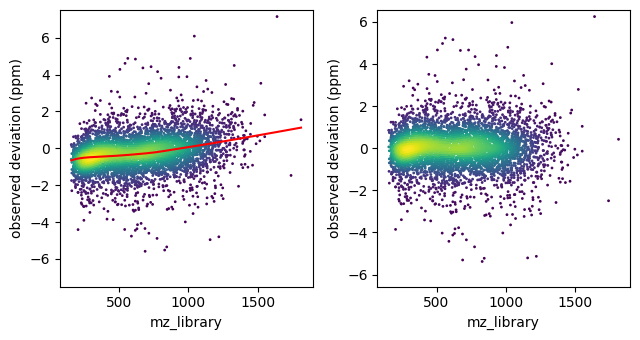

0:02:10.233091 INFO: calibration group: precursor, predicting mz
0:02:10.235338 INFO: calibration group: precursor, predicting rt
0:02:10.238996 INFO: calibration group: fragment, predicting mz
0:02:10.271372 INFO: === checking if optimization conditions were reached ===
0:02:10.273641 PROGRESS: ✅ ms2_error      : 7.0000 <= 7.0000
0:02:10.275693 PROGRESS: ✅ ms1_error      : 4.0000 <= 4.0000
0:02:10.276534 INFO: ==============================================
0:02:10.277952 PROGRESS: Optimization finished for ms2_error, ms1_error.
0:02:10.307340 INFO: calibration group: precursor, predicting mz
0:02:10.313895 INFO: calibration group: precursor, predicting rt
0:02:10.324601 INFO: calibration group: fragment, predicting mz
0:02:10.346373 INFO: Starting optimization step 0.
0:02:10.347606 PROGRESS: === Extracting elution groups 0 to 8000 ===
0:02:10.349375 PROGRESS: Extracting batch of 15881 precursors
0:02:10.356862 INFO: Duty cycle consists of 301 frames, 1.55 seconds cycle time
0:02:10.3

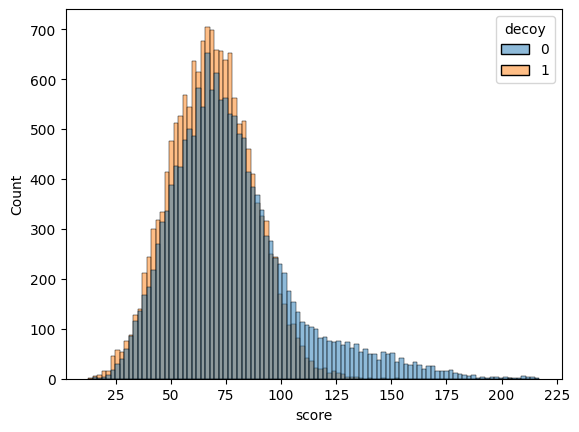

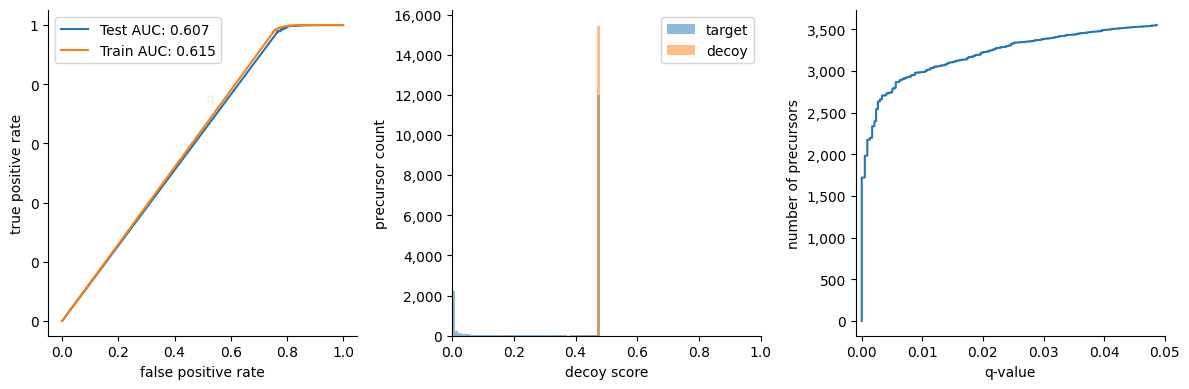

0:02:13.785177 INFO: Resetting torch num_threads to 10
0:02:13.786807 INFO: === FDR correction performed with classifier version 3 ===
0:02:13.789442 PROGRESS: ============================= Precursor FDR =============================
0:02:13.790265 PROGRESS: Total precursors accumulated: 3,552
0:02:13.791240 PROGRESS: Target precursors: 3,387 (95.35%)
0:02:13.791948 PROGRESS: Decoy precursors: 165 (4.65%)
0:02:13.792479 PROGRESS: 
0:02:13.793018 PROGRESS: Precursor Summary:
0:02:13.795559 PROGRESS: Channel   0:	 0.05 FDR: 3,387; 0.01 FDR: 2,958; 0.001 FDR: 2,174
0:02:13.796087 PROGRESS: 
0:02:13.797102 PROGRESS: Protein Summary:
0:02:13.800174 PROGRESS: Channel   0:	 0.05 FDR: 2,431; 0.01 FDR: 2,167; 0.001 FDR: 1,669
0:02:13.800985 PROGRESS: =========================================================================
0:02:13.811961 INFO: fragments_df_filtered: 5000
0:02:13.836339 INFO: calibration group: precursor, fitting mz estimator 


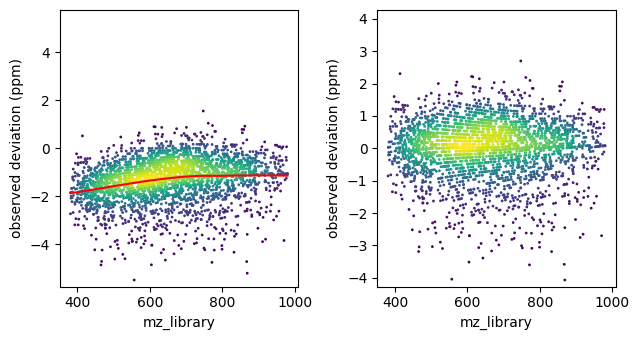

0:02:14.103934 INFO: calibration group: precursor, fitting rt estimator 


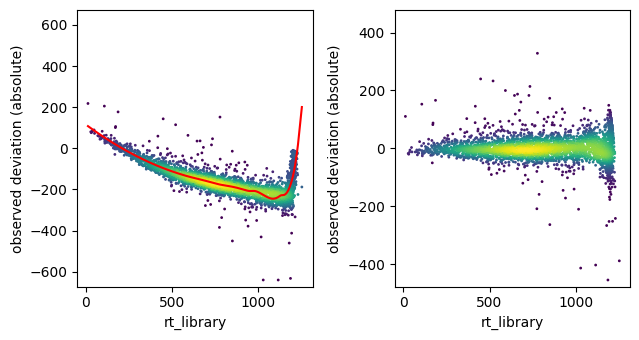

0:02:14.346534 INFO: calibration group: fragment, fitting mz estimator 


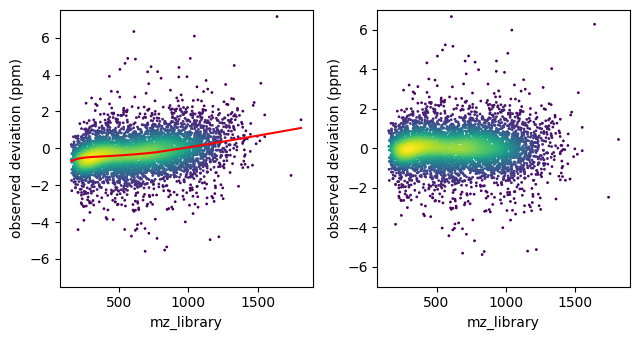

0:02:14.765499 INFO: calibration group: precursor, predicting mz
0:02:14.767612 INFO: calibration group: precursor, predicting rt
0:02:14.770888 INFO: calibration group: fragment, predicting mz
0:02:14.788436 INFO: === checking if optimization conditions were reached ===
0:02:14.790624 PROGRESS: === Optimization of rt_error has been performed 1 time(s); minimum number is 2 ===
0:02:14.797003 PROGRESS: ❌ rt_error       : optimization incomplete after 1 search(es). Will search with parameter 162.6953.
0:02:14.797865 INFO: ==============================================
0:02:14.800145 INFO: Starting optimization step 1.
0:02:14.801385 PROGRESS: === Extracting elution groups 0 to 8000 ===
0:02:14.802216 PROGRESS: Extracting batch of 15881 precursors
0:02:14.805402 INFO: Duty cycle consists of 301 frames, 1.55 seconds cycle time
0:02:14.813193 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
0:02:14.844847 INFO: FWHM in RT is 3.02 seconds, sigma is 0.41
0:02:14.845906 INFO: FWH

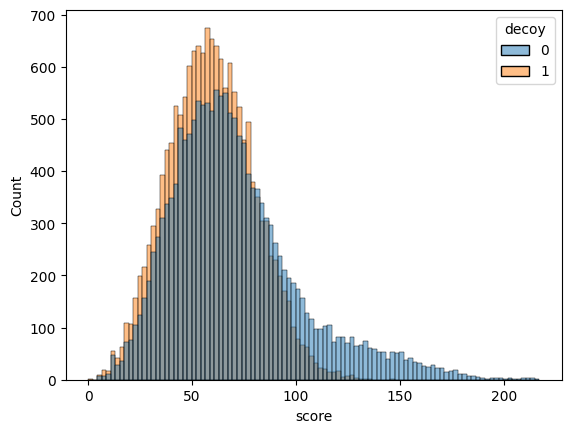

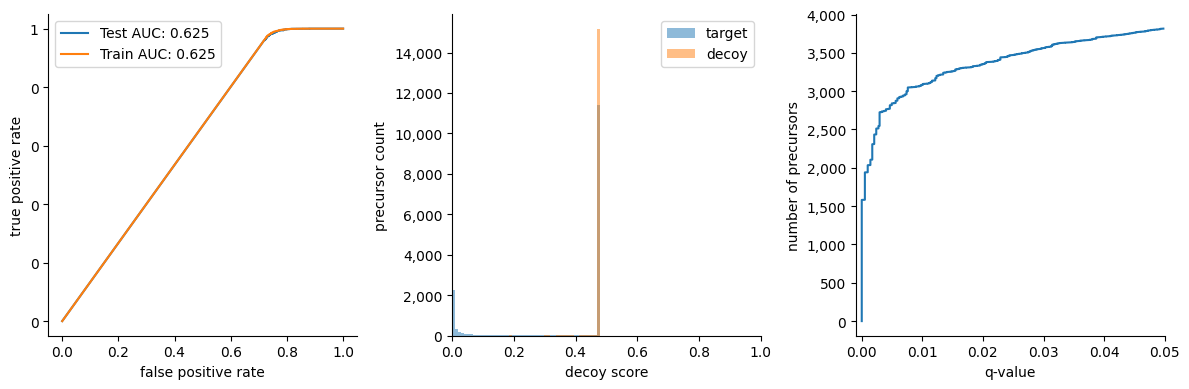

0:02:16.933052 INFO: Resetting torch num_threads to 10
0:02:16.934463 INFO: === FDR correction performed with classifier version 3 ===
0:02:16.936037 PROGRESS: ============================= Precursor FDR =============================
0:02:16.936473 PROGRESS: Total precursors accumulated: 3,849
0:02:16.936910 PROGRESS: Target precursors: 3,657 (95.01%)
0:02:16.937330 PROGRESS: Decoy precursors: 192 (4.99%)
0:02:16.937788 PROGRESS: 
0:02:16.938143 PROGRESS: Precursor Summary:
0:02:16.940426 PROGRESS: Channel   0:	 0.05 FDR: 3,636; 0.01 FDR: 3,053; 0.001 FDR: 2,033
0:02:16.940875 PROGRESS: 
0:02:16.941250 PROGRESS: Protein Summary:
0:02:16.943444 PROGRESS: Channel   0:	 0.05 FDR: 2,584; 0.01 FDR: 2,227; 0.001 FDR: 1,581
0:02:16.943846 PROGRESS: =========================================================================
0:02:16.954129 INFO: fragments_df_filtered: 5000
0:02:16.976003 INFO: calibration group: precursor, fitting mz estimator 


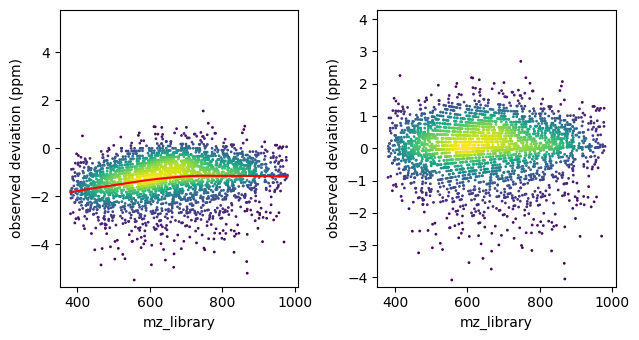

0:02:17.254868 INFO: calibration group: precursor, fitting rt estimator 


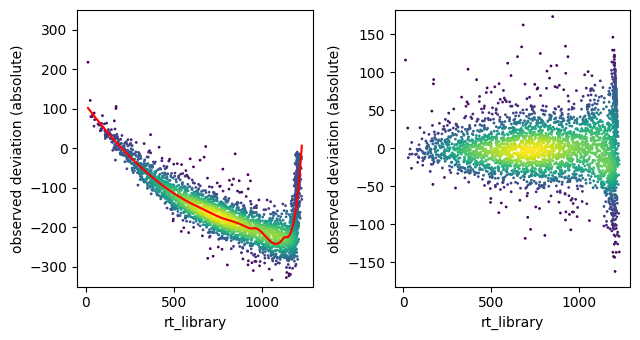

0:02:17.605560 INFO: calibration group: fragment, fitting mz estimator 


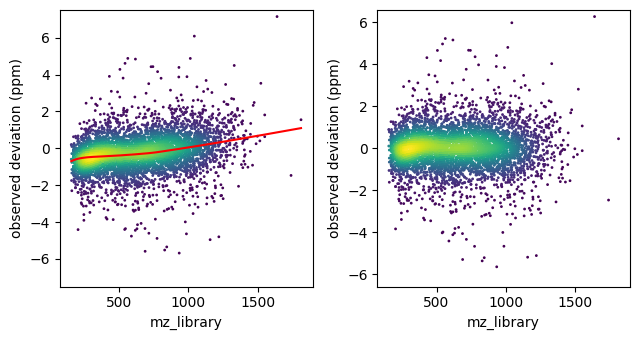

0:02:18.033253 INFO: calibration group: precursor, predicting mz
0:02:18.035341 INFO: calibration group: precursor, predicting rt
0:02:18.039737 INFO: calibration group: fragment, predicting mz
0:02:18.074616 INFO: === checking if optimization conditions were reached ===
0:02:18.076380 PROGRESS: === Optimization of rt_error has been performed 2 time(s); minimum number is 2 ===
0:02:18.081514 PROGRESS: ❌ rt_error       : optimization incomplete after 2 search(es). Will search with parameter 124.1674.
0:02:18.084764 INFO: ==============================================
0:02:18.085599 INFO: Starting optimization step 2.
0:02:18.095064 PROGRESS: === Extracting elution groups 0 to 8000 ===
0:02:18.100432 PROGRESS: Extracting batch of 15881 precursors
0:02:18.109281 INFO: Duty cycle consists of 301 frames, 1.55 seconds cycle time
0:02:18.111155 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
0:02:18.111678 INFO: FWHM in RT is 3.00 seconds, sigma is 0.41
0:02:18.112442 INFO: FWH

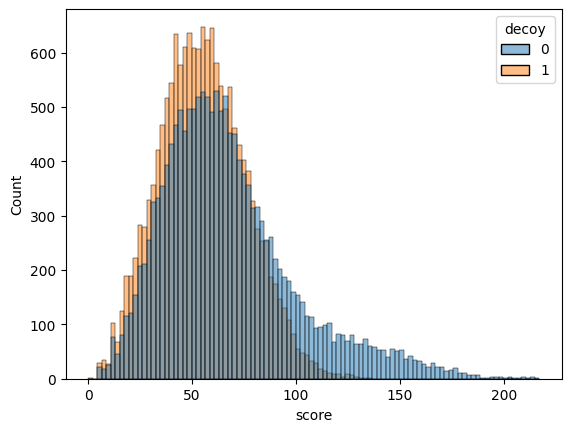

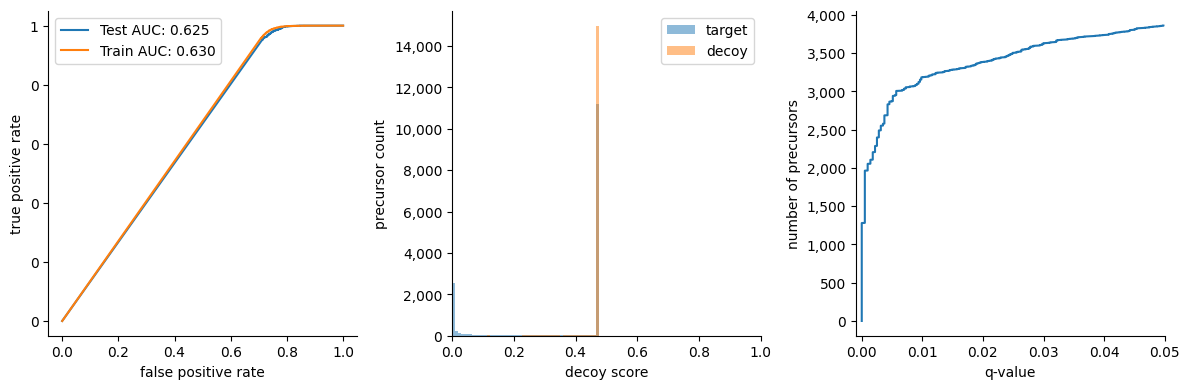

0:02:19.967085 INFO: Resetting torch num_threads to 10
0:02:19.968721 INFO: === FDR correction performed with classifier version 3 ===
0:02:19.970240 PROGRESS: ============================= Precursor FDR =============================
0:02:19.970685 PROGRESS: Total precursors accumulated: 3,869
0:02:19.971131 PROGRESS: Target precursors: 3,681 (95.14%)
0:02:19.971561 PROGRESS: Decoy precursors: 188 (4.86%)
0:02:19.971950 PROGRESS: 
0:02:19.972339 PROGRESS: Precursor Summary:
0:02:19.974161 PROGRESS: Channel   0:	 0.05 FDR: 3,675; 0.01 FDR: 3,152; 0.001 FDR: 2,051
0:02:19.974598 PROGRESS: 
0:02:19.974901 PROGRESS: Protein Summary:
0:02:19.977449 PROGRESS: Channel   0:	 0.05 FDR: 2,611; 0.01 FDR: 2,304; 0.001 FDR: 1,584
0:02:19.977822 PROGRESS: =========================================================================
0:02:19.990985 INFO: fragments_df_filtered: 5000
0:02:20.011913 INFO: calibration group: precursor, fitting mz estimator 


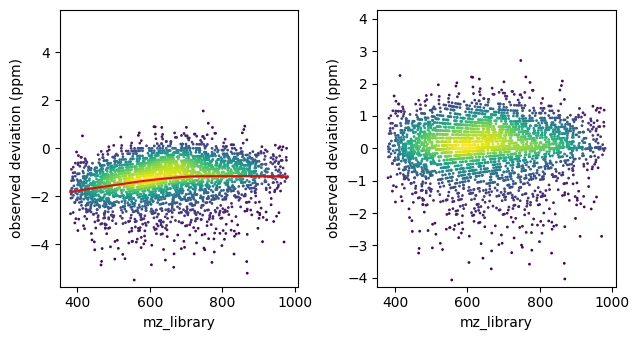

0:02:20.330363 INFO: calibration group: precursor, fitting rt estimator 


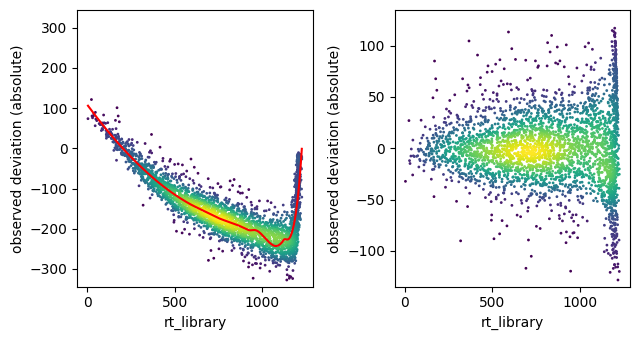

0:02:20.558282 INFO: calibration group: fragment, fitting mz estimator 


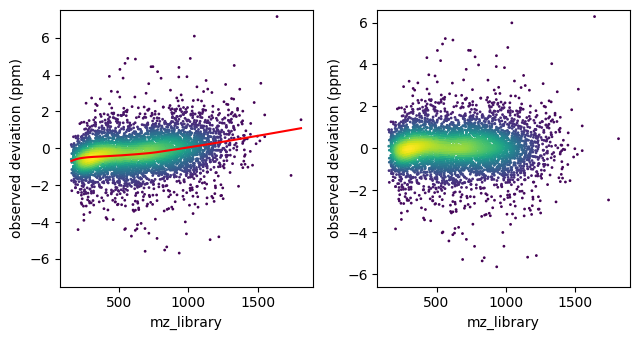

0:02:20.985794 INFO: calibration group: precursor, predicting mz
0:02:20.987939 INFO: calibration group: precursor, predicting rt
0:02:20.991291 INFO: calibration group: fragment, predicting mz
0:02:21.061813 INFO: === checking if optimization conditions were reached ===
0:02:21.087760 PROGRESS: === Optimization of rt_error has been performed 3 time(s); minimum number is 2 ===
0:02:21.099752 PROGRESS: ❌ rt_error       : optimization incomplete after 3 search(es). Will search with parameter 113.1823.
0:02:21.101762 INFO: ==============================================
0:02:21.104319 INFO: Starting optimization step 3.
0:02:21.110498 PROGRESS: === Extracting elution groups 0 to 8000 ===
0:02:21.112118 PROGRESS: Extracting batch of 15881 precursors
0:02:21.130593 INFO: Duty cycle consists of 301 frames, 1.55 seconds cycle time
0:02:21.133954 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
0:02:21.135333 INFO: FWHM in RT is 2.98 seconds, sigma is 0.41
0:02:21.136183 INFO: FWH

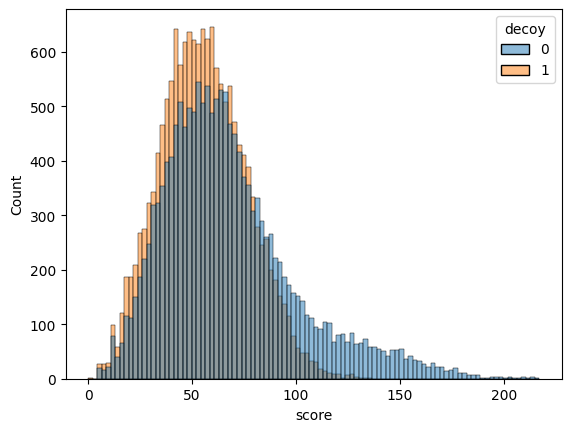

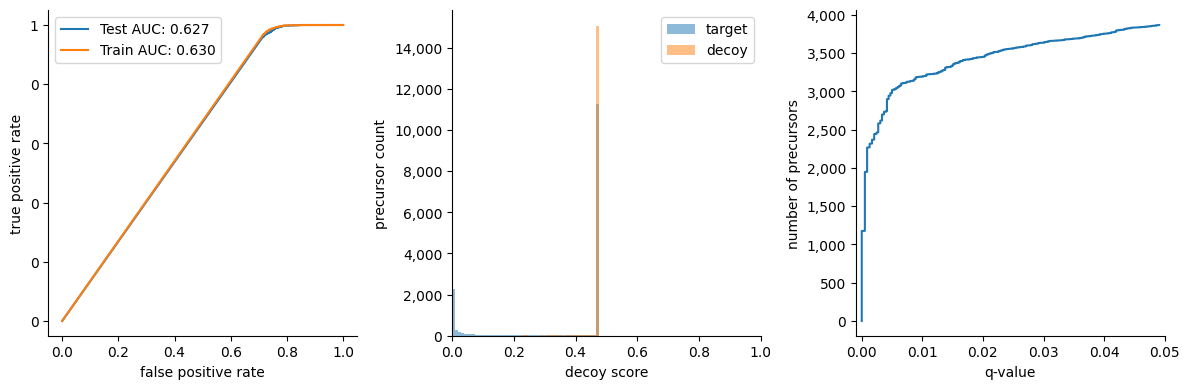

0:02:23.133119 INFO: Resetting torch num_threads to 10
0:02:23.134984 INFO: === FDR correction performed with classifier version 3 ===
0:02:23.136345 PROGRESS: ============================= Precursor FDR =============================
0:02:23.136771 PROGRESS: Total precursors accumulated: 3,867
0:02:23.137192 PROGRESS: Target precursors: 3,686 (95.32%)
0:02:23.137643 PROGRESS: Decoy precursors: 181 (4.68%)
0:02:23.138066 PROGRESS: 
0:02:23.138460 PROGRESS: Precursor Summary:
0:02:23.140396 PROGRESS: Channel   0:	 0.05 FDR: 3,686; 0.01 FDR: 3,161; 0.001 FDR: 2,264
0:02:23.140789 PROGRESS: 
0:02:23.141127 PROGRESS: Protein Summary:
0:02:23.143377 PROGRESS: Channel   0:	 0.05 FDR: 2,626; 0.01 FDR: 2,310; 0.001 FDR: 1,730
0:02:23.143703 PROGRESS: =========================================================================
0:02:23.158124 INFO: fragments_df_filtered: 5000
0:02:23.188395 INFO: calibration group: precursor, fitting mz estimator 


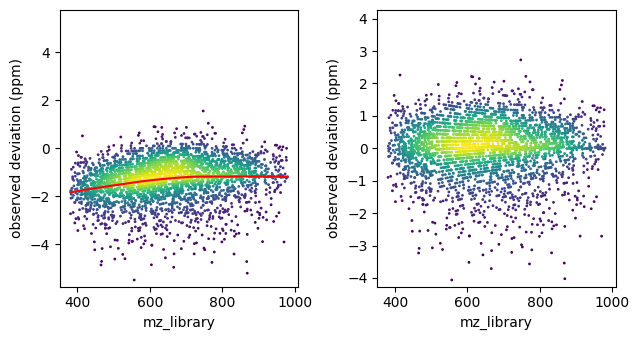

0:02:23.499555 INFO: calibration group: precursor, fitting rt estimator 


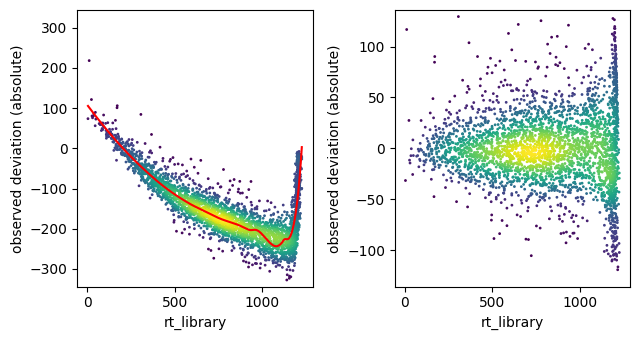

0:02:23.750638 INFO: calibration group: fragment, fitting mz estimator 


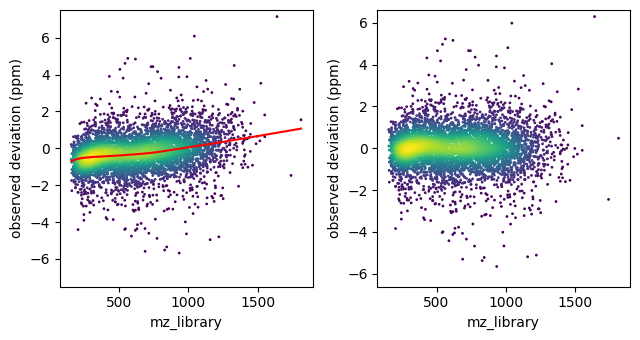

0:02:24.205191 INFO: calibration group: precursor, predicting mz
0:02:24.207204 INFO: calibration group: precursor, predicting rt
0:02:24.210503 INFO: calibration group: fragment, predicting mz
0:02:24.268214 INFO: === checking if optimization conditions were reached ===
0:02:24.269226 PROGRESS: === Optimization of rt_error has been performed 4 time(s); minimum number is 2 ===
0:02:24.274221 PROGRESS: ❌ rt_error       : optimization incomplete after 4 search(es). Will search with parameter 116.0449.
0:02:24.275251 INFO: ==============================================
0:02:24.276258 INFO: Starting optimization step 4.
0:02:24.277203 PROGRESS: === Extracting elution groups 0 to 8000 ===
0:02:24.277789 PROGRESS: Extracting batch of 15881 precursors
0:02:24.285529 INFO: Duty cycle consists of 301 frames, 1.55 seconds cycle time
0:02:24.286127 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
0:02:24.286908 INFO: FWHM in RT is 2.97 seconds, sigma is 0.41
0:02:24.287785 INFO: FWH

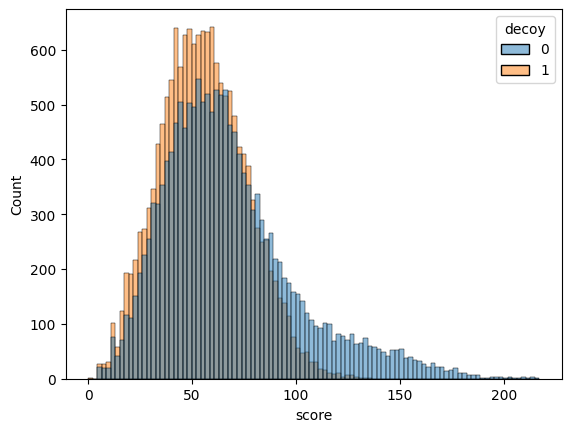

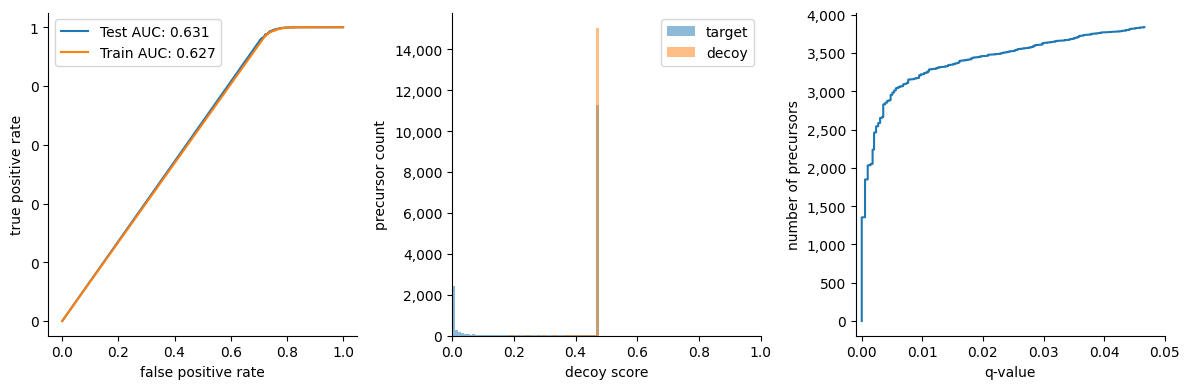

0:02:26.105788 INFO: Resetting torch num_threads to 10
0:02:26.107711 INFO: === FDR correction performed with classifier version 3 ===
0:02:26.109421 PROGRESS: ============================= Precursor FDR =============================
0:02:26.109956 PROGRESS: Total precursors accumulated: 3,836
0:02:26.110402 PROGRESS: Target precursors: 3,665 (95.54%)
0:02:26.110809 PROGRESS: Decoy precursors: 171 (4.46%)
0:02:26.111146 PROGRESS: 
0:02:26.111357 PROGRESS: Precursor Summary:
0:02:26.113168 PROGRESS: Channel   0:	 0.05 FDR: 3,665; 0.01 FDR: 3,190; 0.001 FDR: 2,031
0:02:26.113505 PROGRESS: 
0:02:26.113957 PROGRESS: Protein Summary:
0:02:26.116479 PROGRESS: Channel   0:	 0.05 FDR: 2,607; 0.01 FDR: 2,326; 0.001 FDR: 1,576
0:02:26.116889 PROGRESS: =========================================================================
0:02:26.127650 INFO: fragments_df_filtered: 5000
0:02:26.148197 INFO: calibration group: precursor, fitting mz estimator 


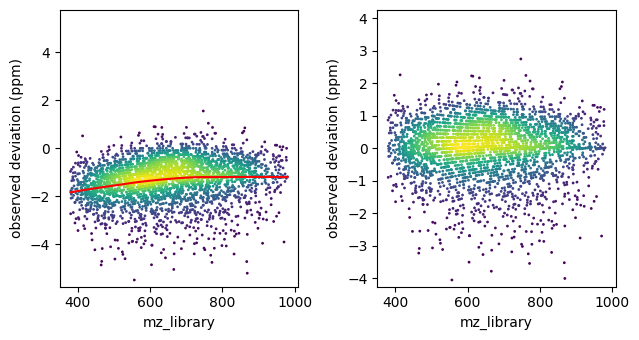

0:02:26.432319 INFO: calibration group: precursor, fitting rt estimator 


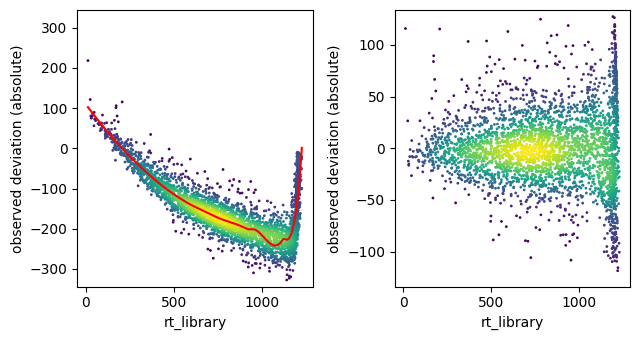

0:02:26.712164 INFO: calibration group: fragment, fitting mz estimator 


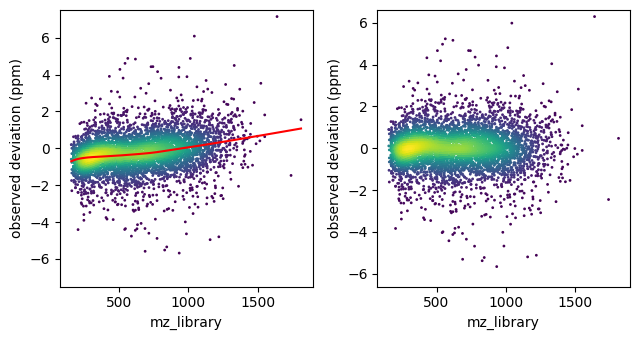

0:02:27.120301 INFO: calibration group: precursor, predicting mz
0:02:27.123448 INFO: calibration group: precursor, predicting rt
0:02:27.130042 INFO: calibration group: fragment, predicting mz
0:02:27.156593 INFO: === checking if optimization conditions were reached ===
0:02:27.158335 PROGRESS: === Optimization of rt_error has been performed 5 time(s); minimum number is 2 ===
0:02:27.161243 PROGRESS: ✅ rt_error       : optimization complete. Optimal parameter 113.1823 found after 5 searches.
0:02:27.162376 INFO: ==============================================
0:02:27.163684 PROGRESS: Optimization finished for rt_error.
0:02:27.199243 INFO: calibration group: precursor, predicting mz
0:02:27.206214 INFO: calibration group: precursor, predicting rt
0:02:27.210853 INFO: calibration group: fragment, predicting mz


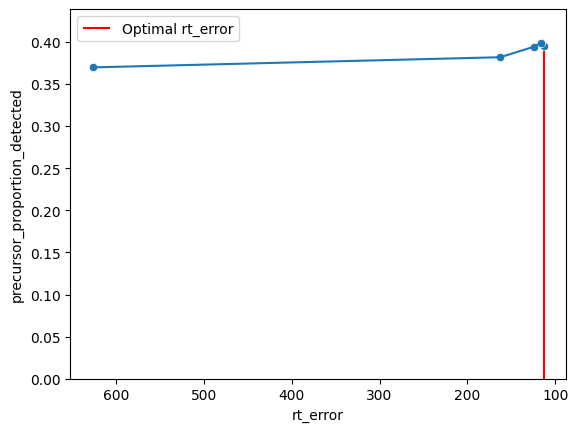

0:02:27.323271 PROGRESS: Search parameter optimization finished. Values taken forward for search are:
0:02:27.325962 PROGRESS: ==============================================
0:02:27.326827 PROGRESS: ms2_error      : 7.0000
0:02:27.328287 PROGRESS: ms1_error      : 4.0000
0:02:27.329123 PROGRESS: rt_error       : 113.1823
0:02:27.330617 PROGRESS: ==============================================
0:02:27.336020 INFO: calibration group: precursor, predicting mz
0:02:27.438248 INFO: calibration group: precursor, predicting rt
0:02:27.584294 INFO: calibration group: fragment, predicting mz
0:02:28.132351 PROGRESS: Extracting batch of 481467 precursors
0:02:28.191591 INFO: Duty cycle consists of 301 frames, 1.55 seconds cycle time
0:02:28.194544 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
0:02:28.195575 INFO: FWHM in RT is 2.97 seconds, sigma is 0.41
0:02:28.199073 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
0:02:28.199896 INFO: Starting candidate selection
100%|████

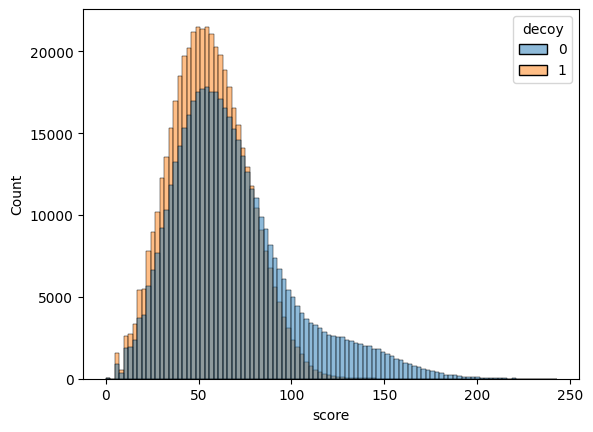

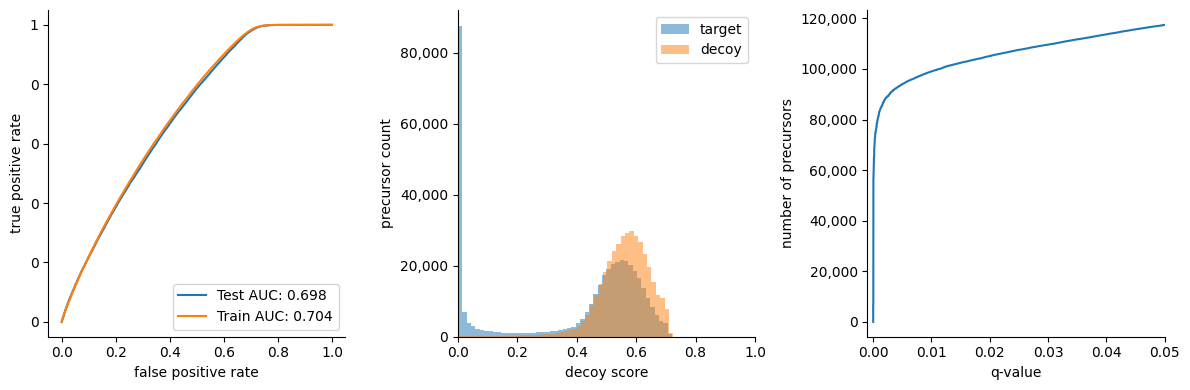

0:03:07.243063 INFO: Resetting torch num_threads to 10
0:03:07.271398 INFO: Removing fragments below FDR threshold
0:03:07.373402 PROGRESS: ============================= Precursor FDR =============================
0:03:07.374758 PROGRESS: Total precursors accumulated: 99,002
0:03:07.378835 PROGRESS: Target precursors: 98,022 (99.01%)
0:03:07.379256 PROGRESS: Decoy precursors: 980 (0.99%)
0:03:07.379592 PROGRESS: 
0:03:07.379955 PROGRESS: Precursor Summary:
0:03:07.420792 PROGRESS: Channel   0:	 0.05 FDR: 98,022; 0.01 FDR: 98,022; 0.001 FDR: 82,606
0:03:07.421713 PROGRESS: 
0:03:07.422237 PROGRESS: Protein Summary:
0:03:07.482075 PROGRESS: Channel   0:	 0.05 FDR: 10,258; 0.01 FDR: 10,258; 0.001 FDR: 9,375
0:03:07.482888 PROGRESS: =========================================================================
0:03:07.959443 INFO: Finished workflow for 20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_05
0:03:08.813983 PROGRESS: Processing search outputs
0:03:08.814405 PROGRESS: Performing 

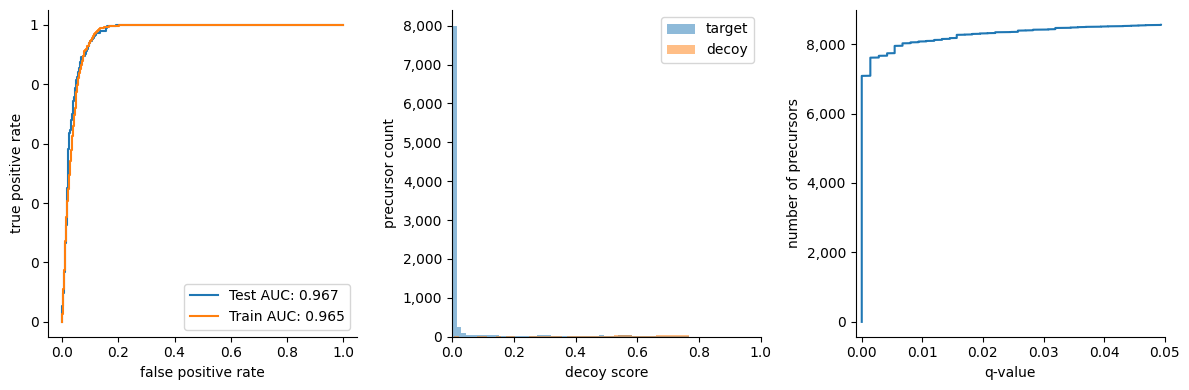

0:03:23.294455 PROGRESS: ================ Protein FDR =================
0:03:23.294911 PROGRESS: Unique protein groups in output
0:03:23.295188 PROGRESS:   1% protein FDR: 8,068
0:03:23.295507 PROGRESS: 
0:03:23.295903 PROGRESS: Unique precursor in output
0:03:23.296148 PROGRESS:   1% protein FDR: 96,044
0:03:23.296478 PROGRESS: ================================================
0:03:23.316691 PROGRESS: Building search statistics
0:03:23.351924 INFO: Loaded OptimizationManager from /Users/georgwallmann/Documents/data/alphadia-validate/output/quant/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_05/optimization_manager.pkl
0:03:23.352907 INFO: Initializing OptimizationManager
0:03:23.354398 INFO: Loaded CalibrationManager from /Users/georgwallmann/Documents/data/alphadia-validate/output/quant/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_05/calibration_manager.pkl
0:03:23.355187 INFO: Initializing CalibrationManager
0:03:23.356252 INFO: Loaded RawFileManager from /Users/geor

In [8]:
config = {
    "general": {
        "thread_count": 10,
    },
    "search": {
        "target_ms1_tolerance": 4,
        "target_ms2_tolerance": 7,
    },
    "raw_paths": raw_data_path_list,
    "library_path": library_path,
}
step = search_step.SearchStep(output_folder, config=config)
step.run()